In [1]:
from nltk import ngrams
import pandas as pd

In [ ]:
# based on https://www.analyticsvidhya.com/blog/2021/09/what-are-n-grams-and-how-to-implement-them-in-python/

In [2]:
df = pd.read_csv(r"dataset\processed\processed_data_sentiment.csv")

In [11]:
#text = df.at[0,"text_cleaned"]

def generate_N_grams(text,ngram_n=1):
    words=[word for word in text.split(" ")]
    temp=zip(*[words[i:] for i in range(0,ngram_n)])
    ans=[' '.join(ngram) for ngram in temp]

    return ans

In [6]:
from collections import defaultdict

In [7]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)

In [8]:
df.head()

,Unnamed: 0.1,Unnamed: 0,id,edit_history_tweet_ids,created_at,text,author_id,text_cleaned,text_cleaned_stemmed,mdhugol_sentiment,mdhugol_sentiment_score,indobert_sentiment,indobert_sentiment_score
0,0,0,1880655687866552831,1880655687866552831,2025-01-18T16:37:11.000Z,Ketua Umum PDIP Megawati Soekarnoputri sempat ...,917707622026928129,ketua umum pdip megawati soekarnoputri sempat ...,ketua umum pdip megawati soekarnoputri sempat ...,neutral,0.989232,Neutral,0.999553
1,1,1,1880655628819165446,1880655628819165446,2025-01-18T16:36:57.000Z,@HabilIsl Hold $WOWO dapat airdrop makan siang...,112500656,hold wowo dapat airdrop makansianggratis,hold wowo dapat airdrop makansianggratis,positive,0.912627,Neutral,0.999512
2,2,2,1880655540717842742,1880655540717842742,2025-01-18T16:36:36.000Z,KALAU MBG NYA INI GUE JUGA MAU DUT BIAR GUE MU...,1266052828742602752,kalau mbg nya ini gue juga mau dut biar gue mu...,kalau mbg nya ini gue juga mau dut biar gue mu...,negative,0.982285,Negative,0.999828
3,3,3,1880655480122651014,1880655480122651014,2025-01-18T16:36:22.000Z,@neohistoria_id program MBG tuh B nya Bersyuku...,1838116873331945472,program mbg tuh b nya bersyukur bukan bergizi,program mbg tuh b nya syukur bukan gizi,negative,0.985092,Negative,0.996238
4,4,4,1880655463207117137,1880655463207117137,2025-01-18T16:36:17.000Z,@03__nakula Ga semua anak Indonesia bisa makan...,1511016593353936896,enggak semua anak indonesia bisa makan siang ...,enggak semua anak indonesia bisa makan siang i...,negative,0.990175,Neutral,0.564391


In [27]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df[df.mdhugol_sentiment=="positive"].text_cleaned_stemmed:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

In [28]:
for text in df[df.mdhugol_sentiment=="negative"].text_cleaned_stemmed:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

In [29]:
for text in df[df.mdhugol_sentiment=="neutral"].text_cleaned_stemmed:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1

In [30]:
df_positive=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

In [31]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

In [22]:
from matplotlib import pyplot as plt

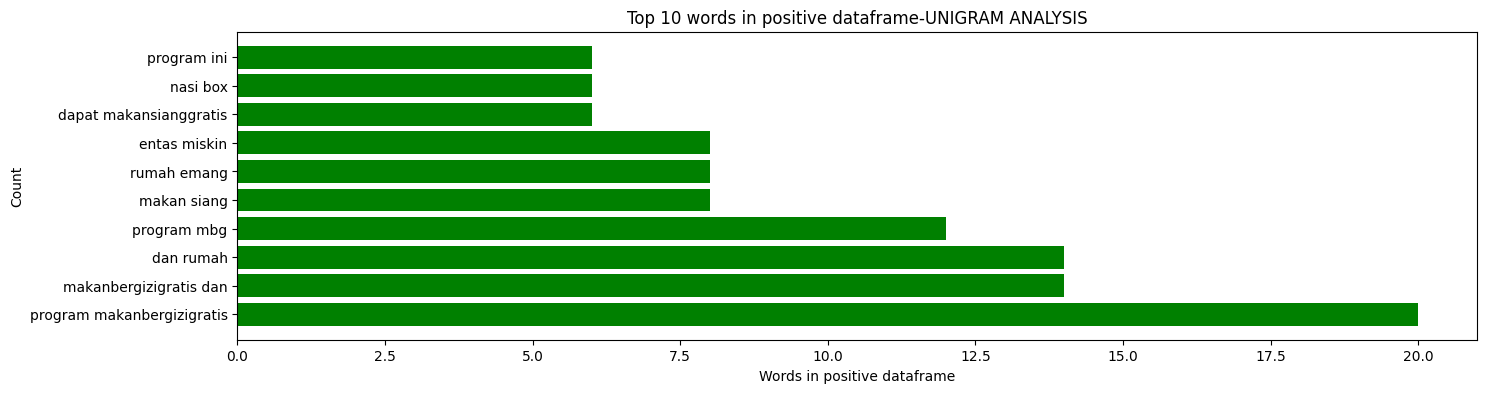

In [32]:
plt.figure(1,figsize=(16,4))
plt.barh(pd1,pd2, color ='green')
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
#plt.savefig("positive-unigram.png")
plt.show()



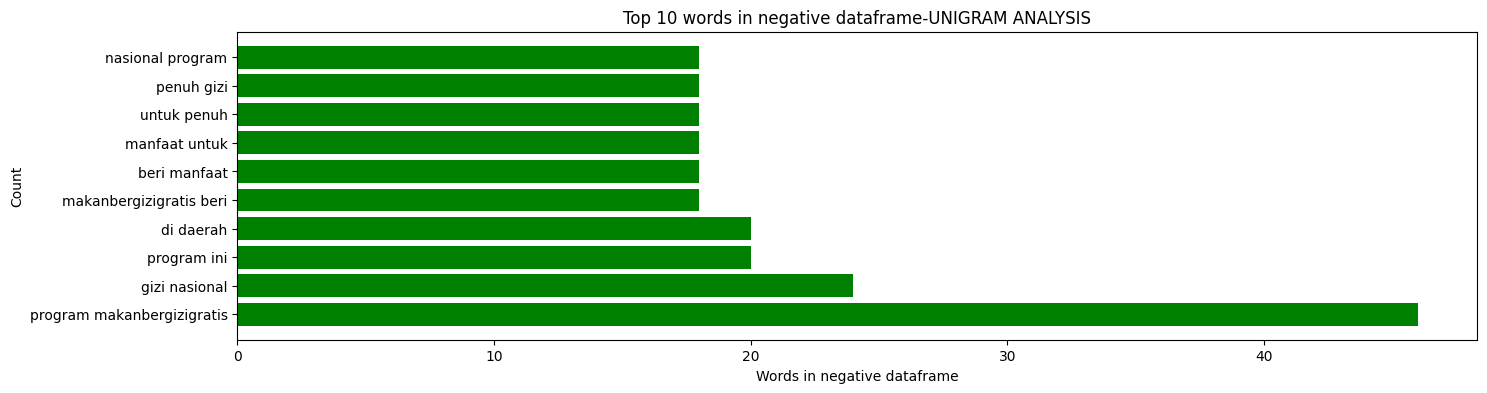

In [33]:
plt.figure(1,figsize=(16,4))
plt.barh(nud1,nud2, color ='green')
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")
#plt.savefig("positive-unigram.png")
plt.show()

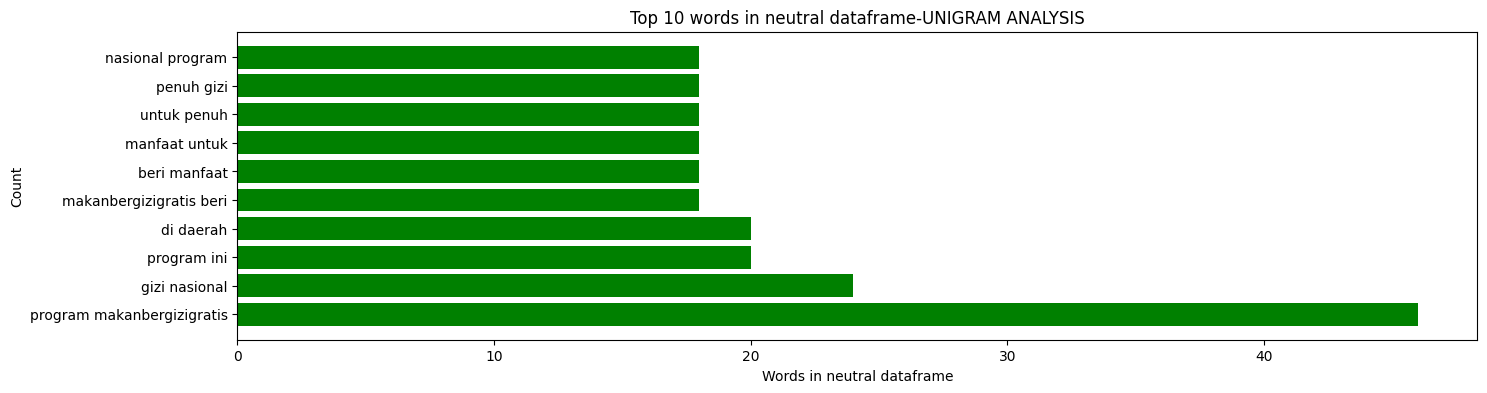

In [34]:
plt.figure(1,figsize=(16,4))
plt.barh(nud1,nud2, color ='green')
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")
#plt.savefig("positive-unigram.png")
plt.show()

In [40]:
pd.DataFrame(positiveValues2,index=range(len(positiveValues2))).T[0]

hold wowo                   2
wowo dapat                  2
dapat airdrop               2
airdrop makansianggratis    2
neng banget                 2
                           ..
lgi makan                   2
makan gakan                 2
gakan kek                   2
kek mbg                     2
mbg prabowo                 2
Name: 0, Length: 881, dtype: int64